# Assignment 3

In [1]:
import subprocess
import matplotlib.pyplot as plot
from pprint import pprint
from operator import itemgetter

times = []
cyc_cnts = []

NUM_TRIALS = 5
CPU_FREQ_HZ = 650000000 # CPU frequency is 650 MHz

# Run the Fibonacci program and get the time and cycle count stats
for nterms in range(6, 28, 3):
    trial_times = []
    trial_cyc_cnts = []
    print(f"\nRunning fib.py for number of terms: {nterms}")

    for trial in range(0, NUM_TRIALS):
        res = subprocess.run(
                  ["taskset", "-c", "1", "python3", "fib.py", str(nterms)],
                  capture_output = True, text = True)

        trial_times.append(float(res.stdout.split(",")[0].strip()))
        trial_cyc_cnts.append(int(res.stdout.split(",")[1].strip()))

    print("\nTimes:\n")
    pprint(trial_times)
    print("\nCycle counts:\n")
    pprint(trial_cyc_cnts)

    time_avg = sum(trial_times) / NUM_TRIALS

    err_squared_sum = 0
    # Calculate the standard deviation
    for t in trial_times:
        err_squared_sum += (t - time_avg) ** 2
    time_stddev = (err_squared_sum / NUM_TRIALS) ** 0.5

    cyc_cnt_avg = sum(trial_cyc_cnts) / NUM_TRIALS

    err_squared_sum = 0
    # Calculate the standard deviation
    for cc in trial_cyc_cnts:
        err_squared_sum += (cc - cyc_cnt_avg) ** 2
    cyc_cnt_stddev = (err_squared_sum / NUM_TRIALS) ** 0.5

    times.append((time_avg, time_stddev))
    cyc_cnts.append((cyc_cnt_avg / CPU_FREQ_HZ, cyc_cnt_stddev / CPU_FREQ_HZ))

print("\nOverall data")
pprint(times)
print("\n")
pprint(cyc_cnts)


Running fib.py for number of terms: 6

Times:

[0.00013256072998046875,
 0.0001461505889892578,
 0.00013375282287597656,
 0.00013566017150878906,
 0.00013208389282226562]

Cycle counts:

[46012, 47591, 46474, 47813, 45621]

Running fib.py for number of terms: 9

Times:

[0.00028395652770996094,
 0.000278472900390625,
 0.0002810955047607422,
 0.00027871131896972656,
 0.0002799034118652344]

Cycle counts:

[144431, 142426, 141977, 142161, 142490]

Running fib.py for number of terms: 12

Times:

[0.0009250640869140625,
 0.0009534358978271484,
 0.0009064674377441406,
 0.0009062290191650391,
 0.0009250640869140625]

Cycle counts:

[560808, 574150, 548778, 550037, 561809]

Running fib.py for number of terms: 15

Times:

[0.0035181045532226562,
 0.0035085678100585938,
 0.0035195350646972656,
 0.0035791397094726562,
 0.0035033226013183594]

Cycle counts:

[2249511, 2242374, 2250878, 2285050, 2240091]

Running fib.py for number of terms: 18

Times:

[0.013858556747436523,
 0.013887882232666016

Text(0.5, 1.0, 'Performance measured through time module')

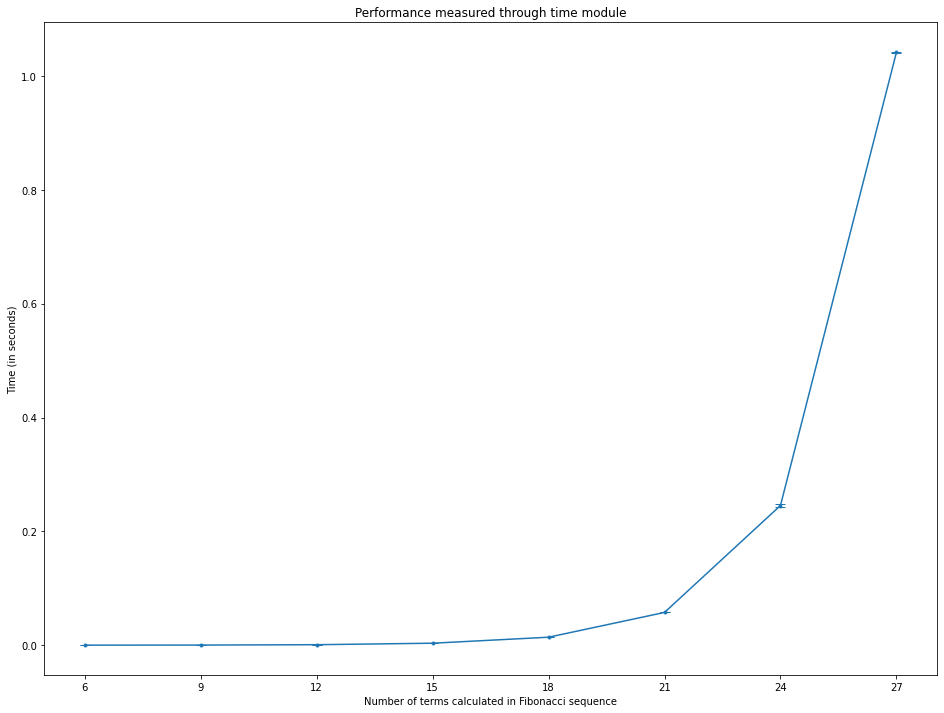

In [8]:
plot.figure(figsize=(16, 12))
plot.errorbar(
    range(6, 28, 3), # X data
    list(map(itemgetter(0), times)), # Y data
    list(map(itemgetter(1), times)), # Standard deviations
    marker = '.', capsize = 5.0)

plot.xticks(range(6, 28, 3))
plot.xlabel("Number of terms calculated in Fibonacci sequence")
plot.ylabel("Time (in seconds)")

plot.title("Performance measured through time module")

Text(0.5, 1.0, 'Performance measured through PMU counter')

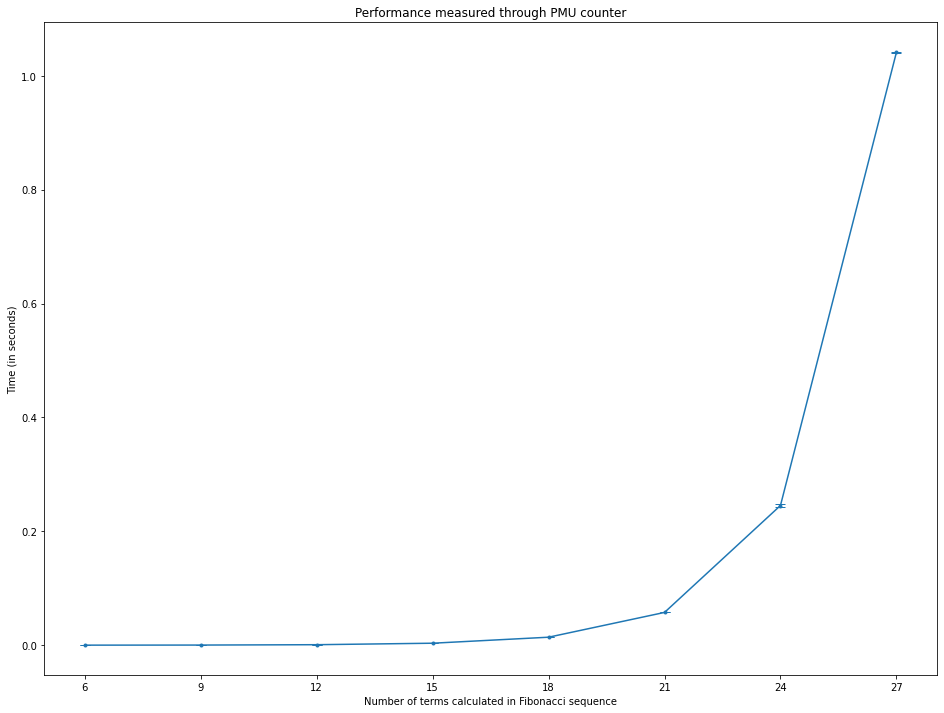

In [9]:
plot.figure(figsize=(16, 12))
plot.errorbar(
    range(6, 28, 3), # X data
    list(map(itemgetter(0), cyc_cnts)), # Y data
    list(map(itemgetter(1), cyc_cnts)), # Standard deviations
    marker = '.', capsize = 5.0)

plot.xticks(range(6, 28, 3))
plot.xlabel("Number of terms calculated in Fibonacci sequence")
plot.ylabel("Time (in seconds)")

plot.title("Performance measured through PMU counter")